In [2]:
# estamos

**PARTE I: ANALIZANDO LA BASE**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
#Bases Tizi
#base_04_sucia = pd.read_stata(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\CC408-T1-4\TP3\Individual_t104.dta")
#base_24_sucia = pd.read_excel(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\CC408-T1-4\TP3\usu_individual_T124.xlsx")

# Base Angie
base_04_sucia = pd.read_stata(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/Individual_t104.dta')
base_24_sucia = pd.read_excel(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/usu_individual_T124.xlsx')


In [5]:
print(base_04_sucia)

         CODUSU  nro_hogar componente  h15    ano4       trimestre  \
0      125098          1.0        1.0   Sí  2004.0  1er. Trimestre   
1      125397          1.0        1.0   Sí  2004.0  1er. Trimestre   
2      125515          1.0        1.0   Sí  2004.0  1er. Trimestre   
3      125558          1.0        1.0   Sí  2004.0  1er. Trimestre   
4      125558          1.0        2.0   Sí  2004.0  1er. Trimestre   
...         ...        ...        ...  ...     ...             ...   
45284  285733          1.0        1.0   Sí  2004.0  1er. Trimestre   
45285  285733          1.0        2.0   Sí  2004.0  1er. Trimestre   
45286  285733          1.0        3.0   Sí  2004.0  1er. Trimestre   
45287  285733          1.0        4.0  0.0  2004.0  1er. Trimestre   
45288  285733          1.0        5.0  0.0  2004.0  1er. Trimestre   

                  region mas_500              aglomerado  pondera  ... deccfr  \
0      Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07 

In [6]:
base_04_filtrada = base_04_sucia.loc[base_04_sucia['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
base_24_filtrada = base_24_sucia.loc[base_24_sucia['AGLOMERADO'].isin([32, 33])]

In [7]:
print(base_24_filtrada)

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
245    TQRMNOSUWHLKMUCDEIJAH00855260  2024          1          1           1   
246    TQRMNOSUWHLKMUCDEIJAH00855260  2024          1          1           2   
247    TQRMNOSUWHLKMUCDEIJAH00855260  2024          1          1           3   
255    TQSMNORWVHLLKQCDEIJAH00856914  2024          1          1           1   
256    TQRMNOPQQHLOLRCDEIJAH00855133  2024          1          1           1   
...                              ...   ...        ...        ...         ...   
46045  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           1   
46046  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           2   
46047  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           3   
46048  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           4   
46049  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           5   

       H15  REGION MAS_500  AGLOMERADO 

In [8]:
print(base_04_filtrada)

        CODUSU  nro_hogar componente  h15    ano4       trimestre  \
0     125098          1.0        1.0   Sí  2004.0  1er. Trimestre   
1     125397          1.0        1.0   Sí  2004.0  1er. Trimestre   
2     125515          1.0        1.0   Sí  2004.0  1er. Trimestre   
3     125558          1.0        1.0   Sí  2004.0  1er. Trimestre   
4     125558          1.0        2.0   Sí  2004.0  1er. Trimestre   
...        ...        ...        ...  ...     ...             ...   
7642  288171          1.0        3.0  0.0  2004.0  1er. Trimestre   
7643  288405          1.0        1.0   Sí  2004.0  1er. Trimestre   
7644  288405          1.0        2.0   Sí  2004.0  1er. Trimestre   
7645  288405          1.0        3.0   Sí  2004.0  1er. Trimestre   
7646  288405          1.0        4.0   Sí  2004.0  1er. Trimestre   

                 region mas_500              aglomerado  pondera  ... deccfr  \
0     Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1     Gran 

In [9]:
# Obtener los nombres de las variables
nombres_variables04 = base_04_sucia.columns.tolist()

# Mostrar los nombres de las variables
print(nombres_variables04)

['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [10]:
# Obtener los nombres de las variables
nombres_variables24 = base_24_filtrada.columns.tolist()

# Mostrar los nombres de las variables
print(nombres_variables24)

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [11]:
#Para poder unir sin problema, me aseguro que als variables esten en el mismo formato
base_04_filtrada.columns = base_04_filtrada.columns.str.lower()
base_24_filtrada.columns = base_24_filtrada.columns.str.lower()

In [12]:
# Obtener los nombres de las variables
nombres_variables24 = base_24_filtrada.columns.tolist()

# Mostrar los nombres de las variables
print(nombres_variables24)

['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp

In [13]:
base_prelimpieza = pd.concat([base_24_filtrada, base_04_filtrada])
print(base_prelimpieza)



                             codusu    ano4       trimestre  nro_hogar  \
245   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
246   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
247   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
255   TQSMNORWVHLLKQCDEIJAH00856914  2024.0               1        1.0   
256   TQRMNOPQQHLOLRCDEIJAH00855133  2024.0               1        1.0   
...                             ...     ...             ...        ...   
7642                       288171    2004.0  1er. Trimestre        1.0   
7643                       288405    2004.0  1er. Trimestre        1.0   
7644                       288405    2004.0  1er. Trimestre        1.0   
7645                       288405    2004.0  1er. Trimestre        1.0   
7646                       288405    2004.0  1er. Trimestre        1.0   

     componente  h15             region mas_500        aglomerado  pondera  \
245           1    1             

In [14]:
print(base_prelimpieza['ipcf'])


245          0.000000
246          0.000000
247          0.000000
255     500000.000000
256          0.000000
            ...      
7642       533.333333
7643       100.000000
7644       100.000000
7645       100.000000
7646       100.000000
Name: ipcf, Length: 14698, dtype: float64


Las variables que vamos a usar son:
- CH04: Sexo
- CH06: Años
- CH07: Estado civil 
- CH08: Estado cobertura médica
- NIVEL_ED: Nivel educativo 
- ESTADO: Condicion de actividad
- CAT_INAC: Categoria de inactividad
- IPCF: Monto de ingreso per cápita familiar percibido en el mes de referencia

In [15]:
#Como las variables de 2004 son categoricas voy a cambiar las variables que nos interesan para que sigan todas las mismas categorias 
conteo_año = base_prelimpieza.groupby(['ano4']).size()
print(conteo_año)


ano4
2004.0    7647
2024.0    7051
dtype: int64


In [16]:
# Hago el conteo por edades 
conteo_edad = base_prelimpieza.groupby(['ch06']).size()
print(conteo_edad)


ch06
-1                 51
1                 180
2                 198
3                 191
4                 199
                 ... 
95                  2
96                  4
97                  1
98 y más años       4
Menos de 1 año    131
Length: 100, dtype: int64


In [17]:
# Genero una nueva base a partir de la original
base_limpieza1 = base_prelimpieza.copy()
# Convierto en cadena para no perder los valores numéricos
base_limpieza1['ch06'] = base_limpieza1['ch06'].astype(str)
# Me aseguro que las variables estén prolijas para que se hagan los cambios que le pido
base_limpieza1['ch06'] = base_limpieza1['ch06'].str.strip().str.lower()
# Reemplazar los valores de edad que no son numeros
base_limpieza1['ch06'] = base_limpieza1['ch06'].replace({
    '98 y más años': '98', 
    'menos de 1 año': '0',
})

In [18]:
#Cambio a numeros porque me duplicaba cada categoria
base_limpieza1['ch06'] = pd.to_numeric(base_limpieza1['ch06'], errors='coerce')
#Lo vuelvo a cambiar a caddena
base_limpieza1['ch06'] = base_limpieza1['ch06'].astype(int).astype(str)
conteo_edad = base_limpieza1.groupby(['ch06']).size()
print(conteo_edad)

ch06
-1     51
0     131
1     180
10    207
11    208
     ... 
94      4
95      2
96      4
97      1
98      4
Length: 100, dtype: int64


In [19]:
# Filtrar el DataFrame para eliminar las filas donde 'ch06' sea igual a '-1'
base_limpieza1 = base_limpieza1[base_limpieza1['ch06'] != '-1']


In [20]:
conteo_edad = base_limpieza1.groupby(['ch06']).size()
print(conteo_edad)

# Contar la cantidad de datos antes de eliminar
cantidad_pre_eliminar = len(base_prelimpieza)
# Contar la cantidad de datos después de eliminar
cantidad_post_eliminar = len(base_limpieza1)

# Calcular y mostrar la cantidad de datos eliminados
datos_eliminados = cantidad_pre_eliminar - cantidad_post_eliminar
print(f"Cantidad de datos eliminados con valor '-1' en 'ch06': {datos_eliminados}")
# Contar la cantidad de datos después de eliminar
cantidad_post_eliminar = len(base_limpieza1)
# Mostrar la cantidad de datos que quedan después de la eliminación
print(f"Cantidad de datos restantes: {cantidad_post_eliminar}")

ch06
0     131
1     180
10    207
11    208
12    244
     ... 
94      4
95      2
96      4
97      1
98      4
Length: 99, dtype: int64
Cantidad de datos eliminados con valor '-1' en 'ch06': 51
Cantidad de datos restantes: 14647


In [21]:
#Genero 
conteo_genero = base_prelimpieza.groupby(['ch04']).size()
print(conteo_genero)

ch04
1        3371
2        3680
Mujer    4045
Varón    3602
dtype: int64


In [22]:
#Convierto en cadena para no perder los valores numericos
base_limpieza1['ch04'] = base_limpieza1['ch04'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_limpieza1['ch04'] = base_limpieza1['ch04'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_limpieza1['ch04'] = base_limpieza1['ch04'].replace({
    '2': '2', 
    'mujer': '2',
    '1': '1',
    'varón': '1'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_limpieza1['ch04'].value_counts())


Resultado del cambio:
ch04
2    7696
1    6951
Name: count, dtype: int64


In [23]:
conteo_estadocivil = base_prelimpieza.groupby(['ch07']).size()
print(conteo_estadocivil)

ch07
1                        1297
2                        1507
3                         459
4                         400
5                        3375
9                          13
Casado                   2372
Separado o divorciado     338
Soltero                  3687
Unido                     821
Viudo                     429
dtype: int64


In [24]:
#Convierto en cadena para no perder los valores numericos
base_limpieza1['ch07'] = base_limpieza1['ch07'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_limpieza1['ch07'] = base_limpieza1['ch07'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores 
base_limpieza1['ch07'] = base_limpieza1['ch07'].replace({
    'unido': '1', 
    'casado': '2', 
    'separado o divorciado': '3', 
    'viudo': '4', 
    'soltero': '5'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_limpieza1['ch07'].value_counts())

Resultado del cambio:
ch07
5    7011
2    3879
1    2118
4     829
3     797
9      13
Name: count, dtype: int64


In [25]:
# Filtrar el DataFrame para eliminar las filas donde 'ch06' sea igual a '-1'
base_limpieza2 = base_limpieza1[base_limpieza1['ch07'] != '9']
print(base_limpieza2['ch07'].value_counts())

ch07
5    7011
2    3879
1    2118
4     829
3     797
Name: count, dtype: int64


In [26]:
# Contar la cantidad total de datos en el DataFrame original
total_datos_original = len(base_limpieza1)

# Filtrar el DataFrame para eliminar las filas donde 'ch07' sea igual a '9'
base_limpieza2 = base_limpieza1[base_limpieza1['ch07'] != '9']

# Contar la cantidad de datos después del filtrado
total_datos_filtrados = len(base_limpieza2)

# Mostrar la cantidad de registros por categoría en 'ch07'
print(base_limpieza2['ch07'].value_counts())

# Imprimir la cantidad total de datos
print("\nCantidad total de datos en el DataFrame original:", total_datos_original)
print("Cantidad de datos después del filtrado:", total_datos_filtrados)


ch07
5    7011
2    3879
1    2118
4     829
3     797
Name: count, dtype: int64

Cantidad total de datos en el DataFrame original: 14647
Cantidad de datos después del filtrado: 14634


In [27]:
conteo_coberturamedica = base_prelimpieza.groupby(['ch08']).size()
print(conteo_coberturamedica)
total_coberturas = conteo_coberturamedica.sum()
print("\nCantidad total:", total_coberturas)


ch08
1                                                               4308
2                                                                566
3                                                                  2
4                                                               2025
9                                                                 25
12                                                               121
13                                                                 3
23                                                                 1
Mutual/Prepaga/Servicio de emergencia                            610
Mutual/prepaga/servicio de emergencia/planes y seguros públi       4
No paga ni le descuentan                                        3296
Ns./Nr.                                                           11
Obra social (incluye PAMI)                                      3568
Obra social y mutual/prepaga/servicio de emergencia              111
Planes y seguros públicos    

In [28]:
# Crear una copia de la base de datos original
base_limpieza2 = base_limpieza2.copy()
# Convertir a cadena para no perder los valores numéricos
base_limpieza2.loc[:, 'ch08'] = base_limpieza2['ch08'].astype(str)
# Asegurarse de que las variables estén prolijas
base_limpieza2.loc[:, 'ch08'] = base_limpieza2['ch08'].str.strip().str.lower()

# Reemplazar los valores
base_limpieza2.loc[:, 'ch08'] = base_limpieza2['ch08'].replace({
    'obra social (incluye pami)': '1',  
    'mutual/prepaga/servicio de emergencia': '2',  
    'planes y seguros públicos': '3',  
    'no paga ni le descuentan': '4',  
    'ns./nr.': '9',  
    'obra social y mutual/prepaga/servicio de emergencia': '12',  
    'obra social y planes y seguros públicos': '13',  
    'mutual/prepaga/servicio de emergencia/planes y seguros públi': '23',  
    'obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': '123'
})

# Revisar que no se pierdan datos
print('Resultado del cambio:')
print(base_limpieza2['ch08'].value_counts())


Resultado del cambio:
ch08
1     7857
4     5294
2     1172
12     232
3       49
9       23
23       5
13       2
Name: count, dtype: int64


In [29]:
conteo_niveleducativo = base_prelimpieza.groupby(['nivel_ed']).size()
print(conteo_niveleducativo)
total_niveleducativo = conteo_niveleducativo.sum()
print("\nCantidad total:", total_niveleducativo)


nivel_ed
1                                                    867
2                                                    746
3                                                   1416
4                                                   1610
5                                                    882
6                                                   1108
7                                                    422
Primaria Completa                                   1628
Primaria Incompleta (incluye educación especial)    1406
Secundaria Completa                                 1086
Secundaria Incompleta                               1374
Sin instrucción                                      805
Superior Universitaria Completa                      647
Superior Universitaria Incompleta                    701
dtype: int64

Cantidad total: 14698


In [30]:
#Convierto en cadena para no perder los valores numericos
base_limpieza2['nivel_ed'] = base_limpieza2['nivel_ed'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_limpieza2['nivel_ed'] = base_limpieza2['nivel_ed'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_limpieza2['nivel_ed'] = base_limpieza2['nivel_ed'].replace({
    'primaria incompleta (incluye educación especial)': '1',  
    'primaria completa': '2',  
    'secundaria incompleta': '3',  
    'secundaria completa': '4',  
    'superior universitaria incompleta': '5',  
    'superior universitaria completa': '6',  
    'sin instrucción': '7',  
    'ns./nr.': '9'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_limpieza2['nivel_ed'].value_counts())


Resultado del cambio:
nivel_ed
3    2786
4    2693
2    2371
1    2273
6    1755
5    1580
7    1176
Name: count, dtype: int64


In [31]:
conte_estado = base_prelimpieza.groupby(['estado']).size()
print(conte_estado)

estado
0                                                                 41
1                                                               3224
2                                                                311
3                                                               2662
4                                                                813
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Inactivo                                                        2800
Menor de 10 años                                                1230
Ocupado                                                         3079
dtype: int64


In [32]:
#Convierto en cadena para no perder los valores numericos
base_limpieza2['estado'] = base_limpieza2['estado'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_limpieza2['estado'] = base_limpieza2['estado'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_limpieza2['estado'] = base_limpieza2['estado'].replace({
    'ocupado': '1',  
    'desocupado': '2',  
    'inactivo': '3',  
    'menor de 10 años': '4',  
    'entrevista individual no realizada (no respuesta al cuestion': '0'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_limpieza2['estado'].value_counts())


Resultado del cambio:
estado
1    6303
3    5462
4    1992
2     839
0      38
Name: count, dtype: int64


In [33]:
conte_categorainac = base_prelimpieza.groupby(['cat_inac']).size()
print(conte_categorainac)


cat_inac
0                      7193
1                       717
2                        18
3                      1440
4                       653
5                       402
6                        59
7                       186
Ama de casa             816
Discapacitado            41
Estudiante             1594
Jubilado/pensionado     668
Menor de 6 años         763
Otros                   134
Rentista                 14
dtype: int64


In [34]:
#Convierto en cadena para no perder los valores numericos
base_limpieza2['cat_inac'] = base_limpieza2['cat_inac'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_limpieza2['cat_inac'] = base_limpieza2['cat_inac'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_limpieza2['cat_inac'] = base_limpieza2['cat_inac'].replace({
    'jubilado/pensionado': '1',  
    'rentista': '2',  
    'estudiante': '3',  
    'ama de casa': '4',  
    'menor de 6 años': '5',  
    'discapacitado': '6',  
    'otros': '7'
})

#Cambio a numeros y lo vuelvo a cambiar a cadena porque me duplicaba los 0
base_limpieza2['cat_inac'] = pd.to_numeric(base_limpieza2['cat_inac'], errors='coerce')
base_limpieza2['cat_inac'] = base_limpieza2['cat_inac'].astype(int).astype(str)

#Reviso que este bien
print('Resultado del cambio:')
print(base_limpieza2['cat_inac'].value_counts())


Resultado del cambio:
cat_inac
0    7180
3    3034
4    1469
1    1385
5    1114
7     320
6     100
2      32
Name: count, dtype: int64


In [35]:
valores_negativos = base_limpieza2[base_limpieza2['ipcf'] < 0]
cantidad_negativos = len(valores_negativos)
# Mostrar resultados
print(f'Cantidad de valores negativos en "ipcf": {cantidad_negativos}')
if cantidad_negativos > 0:
    print('Valores negativos encontrados:')
    print(valores_negativos['ipcf'])
else:
    print('No se encontraron valores negativos en "ipcf".')

Cantidad de valores negativos en "ipcf": 0
No se encontraron valores negativos en "ipcf".


In [36]:
# Calcular  estadísticas del monto de ingreso 
count_ipcf = base_prelimpieza['ipcf'].count()
mean_ipcf = base_prelimpieza['ipcf'].mean()
std_ipcf = base_prelimpieza['ipcf'].std()
min_ipcf = base_prelimpieza['ipcf'].min()
max_ipcf = base_prelimpieza['ipcf'].max()

print(f"count: {count_ipcf}")
print(f"mean: {mean_ipcf:.2f}")
print(f"std: {std_ipcf:.2f}")
print(f"min: {min_ipcf:.2f}")
print(f"max: {max_ipcf:.2f}")

count: 14698
mean: 76978.86
std: 278296.61
min: 0.00
max: 11312333.33


In [37]:
#PREGUNTARLE A TIZI QUE OPINA
# Filtrar los registros donde h15 == 2
h15_no = base_limpieza2[base_limpieza2['h15'] == 2]

# Obtener las respuestas relevantes
respuestas = h15_no[['h15', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]

# Imprimir las respuestas
print(respuestas)

cantidad_h15_no = len(h15_no)
print("\nCantidad respuestas con h15 == 2:", cantidad_h15_no)

      h15 ch04 ch06 ch07 ch08 nivel_ed estado cat_inac  ipcf
399     2    2   49    2    4        2      0        0   0.0
400     2    2   25    5    4        6      0        0   0.0
401     2    1   20    5    4        5      0        0   0.0
409     2    1   74    5    2        5      0        0   0.0
5564    2    1   77    1    1        3      0        0   0.0
15241   2    1   45    1    4        4      0        0   0.0
17096   2    1   45    2    2        6      0        0   0.0
26078   2    1   16    5    1        3      0        0   0.0
26079   2    1   16    5    1        3      0        0   0.0
26204   2    1   68    2    1        6      0        0   0.0
26205   2    2   66    2    1        6      0        0   0.0
26206   2    1   24    5    1        6      0        0   0.0
27317   2    2   28    5    1        6      0        0   0.0
30607   2    1   20    5    4        1      0        0   0.0
31470   2    1   36    5    9        4      0        0   0.0
34212   2    2   22    5

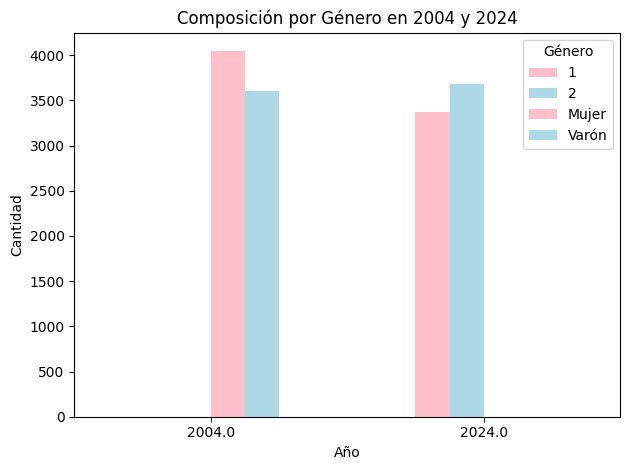

In [38]:
# Contar la cantidad de hombres y mujeres por año
composicion = base_prelimpieza.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)
composicion.plot(kind='bar', color=['pink', 'lightblue'])

# Gráfico
plt.title('Composición por Género en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Para tener las etiquetas en horizontal
plt.legend(title='Género')
plt.tight_layout()  # Ajustar el layout
plt.show()

#AGREGAR ETIQUETA QUE PONGA QUE 2 ES MUJER

In [39]:
variable_matriz = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
base_variables = base_limpieza2[variable_matriz]

# Mostrar la nueva base de datos
print(base_variables)

     ch04 ch06 ch07 ch08 nivel_ed estado cat_inac           ipcf
245     2   85    4    1        2      1        0       0.000000
246     1   59    2    1        6      1        0       0.000000
247     2   57    2    1        6      1        0       0.000000
255     1   26    5    1        6      1        0  500000.000000
256     2   88    4    1        1      3        1       0.000000
...   ...  ...  ...  ...      ...    ...      ...            ...
7642    2    1    5    2        7      4        5     533.333333
7643    1   51    2    1        2      1        0     100.000000
7644    2   55    2    1        2      1        0     100.000000
7645    2   12    5    1        1      3        3     100.000000
7646    1   22    5    1        4      1        0     100.000000

[14634 rows x 8 columns]


In [40]:
# Filtra las columnas no numéricas
non_numeric_cols = base_variables.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac'], dtype='object')


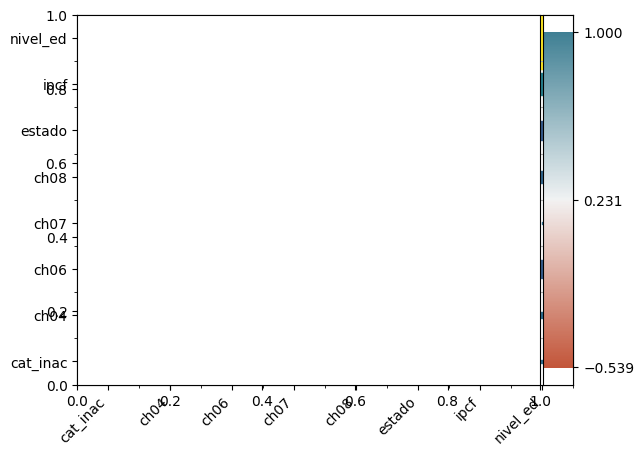

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la paleta de colores
palette = sns.diverging_palette(20, 220, n=256)

# Definición de la función heatmap
def heatmap(x, y, size, color, value_to_color, palette, n_colors, color_min, color_max):
    fig, ax = plt.subplots()

    # Mapeo de nombres de columnas a coordenadas enteras
    x_labels = sorted(x.unique())
    y_labels = sorted(y.unique())
    x_to_num = {p[1]: p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]: p[0] for p in enumerate(y_labels)} 

    size_scale = 2000
    ax.scatter(
        x=x.map(x_to_num),  # Usar mapeo para x
        y=y.map(y_to_num),  # Usar mapeo para y
        s=size * size_scale,  # Tamaños de los marcadores, proporcionales al parámetro size
        c=color.apply(value_to_color),  # Colores de los marcadores, mapeados a la paleta de colores
        marker='s'  # Usar cuadrados como marcadores en el gráfico de dispersión
    )

    # Mostrar etiquetas de columna en los ejes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)   
    ax.set_xlim([-0.5, max(x_to_num.values()) + 0.5]) 
    ax.set_ylim([-0.5, max(y_to_num.values()) + 0.5])

    # Configurar una cuadrícula 1x15
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) 
    ax = plt.subplot(plot_grid[:, :-1])  # Usar las 14 columnas de la cuadrícula para el gráfico principal

    # Agregar leyenda de color en el lado derecho del gráfico
    ax_color = plt.subplot(plot_grid[:, -1])  # Usar la columna más a la derecha del gráfico
    col_x = [0] * len(palette)  # Coordenada x fija para las barras
    bar_y = np.linspace(color_min, color_max, n_colors)  # Coordenadas y para cada una de las n_colors barras

    bar_height = bar_y[1] - bar_y[0]
    ax_color.barh(
        y=bar_y,
        width=[5] * len(palette),  # Hacer las barras de 5 unidades de ancho
        left=col_x,  # Hacer que las barras comiencen en 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    
    ax_color.set_xlim(1, 2)  # Recortar el gráfico en la mitad
    ax_color.grid(False)  # Ocultar la cuadrícula
    ax_color.set_facecolor('white')  # Hacer el fondo blanco
    ax_color.set_xticks([])  # Eliminar las marcas horizontales
    ax_color.set_yticks(np.linspace(min(bar_y), max(bar_y), 3))  # Mostrar marcas verticales para min, medio y max
    ax_color.yaxis.tick_right()  # Mostrar marcas verticales a la derecha

# Calcular la matriz de correlación
matriz = base_variables.corr()
matriz = pd.melt(matriz.reset_index(), id_vars='index')  # Deshacer el marco de datos, para obtener pares de arreglos para x e y
matriz.columns = ['x', 'y', 'value']  # Renombrar columnas

## Definir parámetros para la función heatmap
color = matriz['value']  # Usar los valores de correlación como color
value_to_color = lambda v: (v - color_min) / (color_max - color_min)  # Normaliza a [0, 1]
n_colors = 256  # Número de colores
color_min = matriz['value'].min()  # Valor mínimo de color
color_max = matriz['value'].max()  # Valor máximo de color

# Llamar a la función heatmap con todos los argumentos necesarios
heatmap(
    x=matriz['x'],
    y=matriz['y'],
    size=matriz['value'].abs(),
    color=color,
    value_to_color=value_to_color,
    palette=palette,
    n_colors=n_colors,
    color_min=color_min,
    color_max=color_max
)


<Axes: >

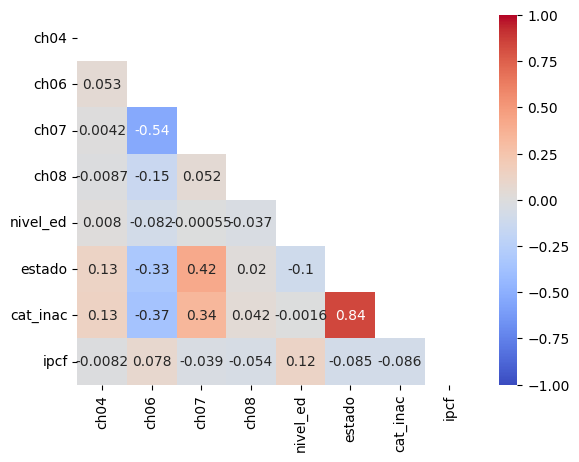

In [42]:
upp_mat = np.triu(base_variables.corr())
sns.heatmap(base_variables.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", mask=upp_mat)

In [43]:
#2C. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
cantidad_desocupados = (base_limpieza2['estado'] == '2').sum()
cantidad_inactivos = (base_limpieza2['estado'] == '3').sum()

print(f"El total de desocupados y de inactivos es {cantidad_desocupados} y {cantidad_inactivos}, respectivamente.")

El total de desocupados y de inactivos es 839 y 5462, respectivamente.


In [44]:
# Calcular la media de IPCF según el estado
media_ipcf_por_estado = base_limpieza2.groupby('estado')['ipcf'].mean().round(2)

# Mostrar el resultado con etiquetas descriptivas
media_ipcf_por_estado = media_ipcf_por_estado.rename({
    '1': 'Ocupado',
    '2': 'Desocupado',
    '3': 'Inactivo'
})

print("Media de IPCF según estado:")
print(media_ipcf_por_estado)



Media de IPCF según estado:
estado
0                 13.82
Ocupado       106443.40
Desocupado     31655.96
Inactivo       63863.08
4              40220.54
Name: ipcf, dtype: float64


In [45]:
## Calcular la media de IPCF según estado y año, redondeando a 2 decimales
base_limpieza2['ano4'] = base_limpieza2['ano4'].astype(str)

media_ipcf_por_estado_ano = base_limpieza2.groupby(['ano4','estado'])['ipcf'].mean().round(2).reset_index()

# Reemplazar valores numéricos de 'estado' con etiquetas descriptivas
estado_labels = {
    '1': 'Ocupado',
    '2': 'Desocupado',
    '3': 'Inactivo',
    '4': 'Menor de 10 años',
    '0': 'No respuesta'
}
media_ipcf_por_estado_ano['estado'] = media_ipcf_por_estado_ano['estado'].replace(estado_labels)

print("Media de IPCF según estado, separado por año:")
print(media_ipcf_por_estado_ano)

Media de IPCF según estado, separado por año:
     ano4            estado       ipcf
0  2004.0      No respuesta      52.53
1  2004.0           Ocupado     476.06
2  2004.0        Desocupado     224.23
3  2004.0          Inactivo     315.89
4  2004.0  Menor de 10 años     246.26
5  2024.0      No respuesta       0.00
6  2024.0           Ocupado  207644.84
7  2024.0        Desocupado   85019.15
8  2024.0          Inactivo  130704.60
9  2024.0  Menor de 10 años  104745.95


In [47]:
# Contar el número de registros con 'No respuesta' en estado
num_no_respuesta = base_limpieza2[base_limpieza2['estado'] == '0'].shape[0]

print("Número de registros con 'No respondieron':", num_no_respuesta)


Número de registros con 'No respuesta': 38


In [46]:
# Contar y mostrar el número de registros con 'No respuesta' en una sola línea
print("Número de registros con 'No respuesta':", base_limpieza2[base_limpieza2['estado'] == '0'].shape[0])


Número de registros con 'No respuesta': 38
